In [2]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import csv

In [59]:
# api key: use your own API key

api = wandb.Api()
runs = api.runs(path="markzhumi1805/PBRS")
for run in runs:
  print("run name = ",run.name," id: ", run.id)

run name =  Sensitivity_PBRS_Test1_JointRegularization_5x0x  id:  gay1su4d
run name =  Sensitivity_PBRS_Test1_JointRegularization_2x0x  id:  is6gvumo
run name =  Sensitivity_PBRS_Test1_JointRegularization_1x0x  id:  iiwnqcso
run name =  Sensitivity_PBRS_Test1_JointRegularization_0x5x  id:  2j13phrh
run name =  Sensitivity_PBRS_Test1_JointRegularization_0x1x  id:  w7votkhu
run name =  Sensitivity_DRS_Test1_JointRegularization_10x0x  id:  lfbxwtco
run name =  Sensitivity_DRS_Test1_JointRegularization_5x0x  id:  e4hxn3v3
run name =  Sensitivity_DRS_Test1_JointRegularization_2x0x  id:  ddjd4jwd
run name =  Sensitivity_DRS_Test1_JointRegularization_1x0x  id:  k29t9lnr
run name =  Sensitivity_DRS_Test1_JointRegularization_0x5x  id:  a5ty554j
run name =  Sensitivity_DRS_Test1_JointRegularization_0x1x  id:  v8x9xtbx
run name =  Sensitivity_DRS_Test1_BaseHeight_10x0x  id:  sfjqwy2n
run name =  Sensitivity_DRS_Test1_BaseHeight_5x0x  id:  3xyz99yy
run name =  Sensitivity_DRS_Test1_BaseHeight_2x0x

In [3]:
run_pbrs = api.run("markzhumi1805/PBRS/0g8eb76y")
run_drs = api.run("markzhumi1805/PBRS/alrjkl2g")
run_baseline = api.run("markzhumi1805/PBRS/yzjrwjn3")

In [4]:
data_pbrs = run_pbrs.history()
print(list(data_pbrs[0].keys()))
history = run_pbrs.scan_history(keys=["Episode/rew_tracking_lin_vel","Episode/rew_tracking_ang_vel","Episode/rew_action_rate","Episode/rew_action_rate2","Episode/rew_torques","Episode/rew_dof_pos_limits","Episode/rew_torque_limits"])
rew_tracking_lin_vel_list = [row["Episode/rew_tracking_lin_vel"] for row in history]
rew_tracking_ang_vel_list = [row["Episode/rew_tracking_ang_vel"] for row in history]
rew_action_rate_list = [row["Episode/rew_action_rate"] for row in history]
rew_action_rate2_list = [row["Episode/rew_action_rate2"] for row in history]
rew_torques_list = [row["Episode/rew_torques"] for row in history]
rew_dof_pos_limits_list = [row["Episode/rew_dof_pos_limits"] for row in history]
rew_torque_limits_list = [row["Episode/rew_torque_limits"] for row in history]

rew_baseline_terms_pbrs_array = np.array(rew_tracking_lin_vel_list) + np.array(rew_tracking_ang_vel_list) + np.array(rew_action_rate_list) + np.array(rew_action_rate2_list) + np.array(rew_torques_list) + np.array(rew_dof_pos_limits_list) + np.array(rew_torque_limits_list)
# print(rew_tracking_lin_vel_list)

Unable to load pandas, call history with pandas=False
['Episode/rew_torque_limits', 'gradients/graph_10.bias', '_runtime', 'Episode/rew_torques', 'Episode/rew_termination', '_step', 'gradients/4.weight', 'Loss/learning_rate', 'Episode/Total_reward', 'Loss/value_function', 'Perf/learning_time', 'gradients/graph_10.weight', 'gradients/2.bias', 'gradients/0.bias', '_timestamp', 'gradients/graph_16.weight', 'Episode/rew_dof_pos_limits', 'Episode/rew_ori_pb', 'gradients/graph_12.weight', 'Episode/rew_baseHeight_pb', 'Episode/rew_tracking_ang_vel', 'gradients/4.bias', 'Perf/collection time', 'gradients/graph_16.bias', 'Loss/surrogate', 'gradients/2.weight', 'Policy/mean_noise_std', 'Episode/rew_action_rate', 'gradients/graph_14.bias', 'gradients/6.weight', 'Episode/rew_action_rate2', 'Perf/total_fps', 'gradients/0.weight', 'Episode/rew_jointReg_pb', 'gradients/6.bias', 'gradients/graph_14.weight', 'Episode/rew_tracking_lin_vel', 'gradients/graph_12.bias']


In [5]:
# data_drs = run_drs.history()
history = run_drs.scan_history(keys=["Episode/rew_tracking_lin_vel","Episode/rew_tracking_ang_vel","Episode/rew_action_rate","Episode/rew_action_rate2","Episode/rew_torques","Episode/rew_dof_pos_limits","Episode/rew_torque_limits"])
rew_tracking_lin_vel_list = [row["Episode/rew_tracking_lin_vel"] for row in history]
rew_tracking_ang_vel_list = [row["Episode/rew_tracking_ang_vel"] for row in history]
rew_action_rate_list = [row["Episode/rew_action_rate"] for row in history]
rew_action_rate2_list = [row["Episode/rew_action_rate2"] for row in history]
rew_torques_list = [row["Episode/rew_torques"] for row in history]
rew_dof_pos_limits_list = [row["Episode/rew_dof_pos_limits"] for row in history]
rew_torque_limits_list = [row["Episode/rew_torque_limits"] for row in history]

rew_baseline_terms_drs_array = np.array(rew_tracking_lin_vel_list) + np.array(rew_tracking_ang_vel_list) + np.array(rew_action_rate_list) + np.array(rew_action_rate2_list) + np.array(rew_torques_list) + np.array(rew_dof_pos_limits_list) + np.array(rew_torque_limits_list)

In [6]:
# data_baseline = run_baseline.history()
history = run_baseline.scan_history(keys=["Episode/rew_tracking_lin_vel","Episode/rew_tracking_ang_vel","Episode/rew_action_rate","Episode/rew_action_rate2","Episode/rew_torques","Episode/rew_dof_pos_limits","Episode/rew_torque_limits"])
rew_tracking_lin_vel_list = [row["Episode/rew_tracking_lin_vel"] for row in history]
rew_tracking_ang_vel_list = [row["Episode/rew_tracking_ang_vel"] for row in history]
rew_action_rate_list = [row["Episode/rew_action_rate"] for row in history]
rew_action_rate2_list = [row["Episode/rew_action_rate2"] for row in history]
rew_torques_list = [row["Episode/rew_torques"] for row in history]
rew_dof_pos_limits_list = [row["Episode/rew_dof_pos_limits"] for row in history]
rew_torque_limits_list = [row["Episode/rew_torque_limits"] for row in history]

rew_baseline_terms_baseline_array = np.array(rew_tracking_lin_vel_list) + np.array(rew_tracking_ang_vel_list) + np.array(rew_action_rate_list) + np.array(rew_action_rate2_list) + np.array(rew_torques_list) + np.array(rew_dof_pos_limits_list) + np.array(rew_torque_limits_list)

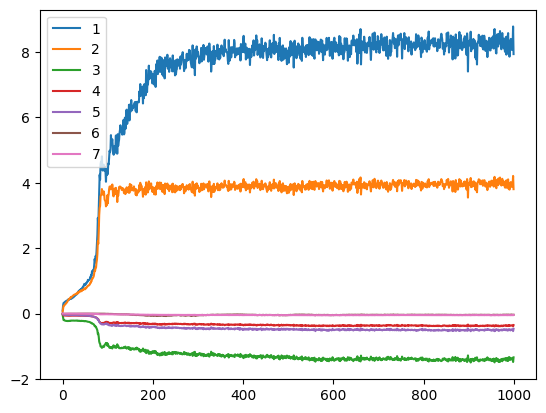

In [7]:
ax = plt.subplot(111)
ax.plot(rew_tracking_lin_vel_list)
ax.plot(rew_tracking_ang_vel_list)
ax.plot(rew_action_rate_list)
ax.plot(rew_action_rate2_list)
ax.plot(rew_torques_list)
ax.plot(rew_dof_pos_limits_list)
ax.plot(rew_torque_limits_list)
ax.legend([1,2,3,4,5,6,7])
plt.show()

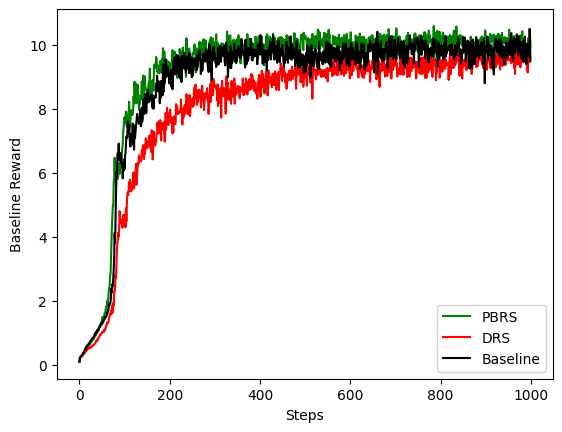

In [8]:
ax = plt.subplot(111)
ax.plot(rew_baseline_terms_pbrs_array,'g')
ax.plot(rew_baseline_terms_drs_array,'r')
ax.plot(rew_baseline_terms_baseline_array,'k')
ax.legend(['PBRS','DRS','Baseline'])
ax.set_xlabel('Steps')
ax.set_ylabel('Baseline Reward')
plt.show()

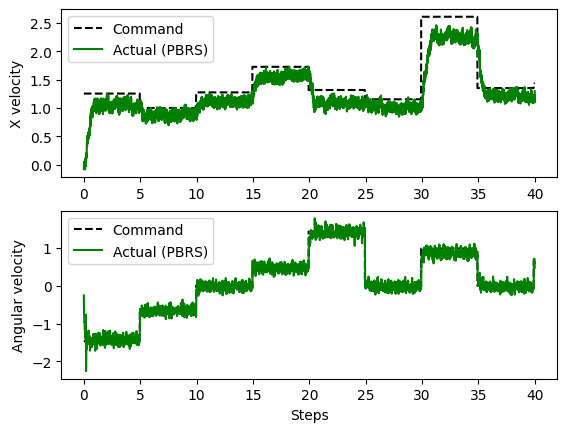

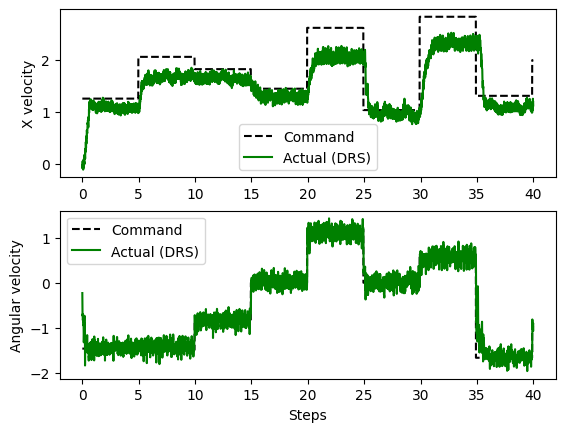

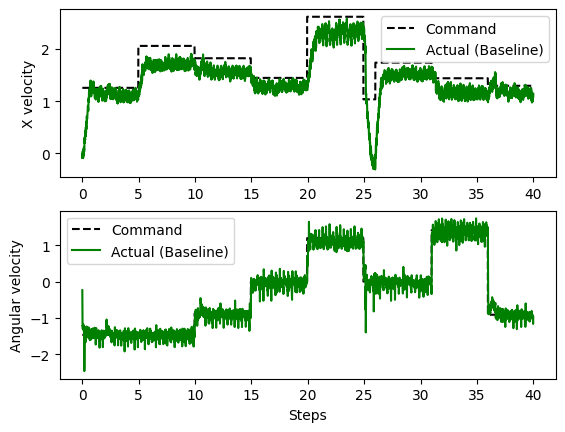

In [29]:
data = []
# Read the CSV file
with open('../gpugym/analysis/data/play_log_PBRS_Test3_Seed4954.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # next(csv_reader)
    # Append each row to the data list
    for row in csv_reader:
        data.append(row)

# Convert the list to a NumPy array
data_PBRS_array = np.array(data, dtype=float)  # Assuming the data is numeric

data = []
# Read the CSV file
with open('../gpugym/analysis/data/play_log_DRS_Test2_Seed4954.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # next(csv_reader)
    # Append each row to the data list
    for row in csv_reader:
        data.append(row)

# Convert the list to a NumPy array
data_DRS_array = np.array(data, dtype=float)  # Assuming the data is numeric

data = []
# Read the CSV file
with open('../gpugym/analysis/data/play_log_Baseline_Test1_Seed4954.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    # Skip the header row if there is one
    # next(csv_reader)
    # Append each row to the data list
    for row in csv_reader:
        data.append(row)

# Convert the list to a NumPy array
data_Baseline_array = np.array(data, dtype=float)  # Assuming the data is numeric

ax = plt.subplot(211)
ax.plot(data_PBRS_array[:,0], data_PBRS_array[:,1],'k--') # command x velocity
ax.plot(data_PBRS_array[:,0], data_PBRS_array[:,5],'g') # actual x velocity
ax.legend(['Command','Actual (PBRS)'])
ax.set_ylabel('X velocity')

ax = plt.subplot(212)
ax.plot(data_PBRS_array[:,0], data_PBRS_array[:,3],'k--') # command angular velocity
ax.plot(data_PBRS_array[:,0], data_PBRS_array[:,10],'g') # actual angular velocity
ax.legend(['Command','Actual (PBRS)'])
ax.set_xlabel('Steps')
ax.set_ylabel('Angular velocity')

plt.show()

ax = plt.subplot(211)
ax.plot(data_DRS_array[:,0], data_DRS_array[:,1],'k--') # command x velocity
ax.plot(data_DRS_array[:,0], data_DRS_array[:,5],'g') # actual x velocity
ax.legend(['Command','Actual (DRS)'])
ax.set_ylabel('X velocity')

ax = plt.subplot(212)
ax.plot(data_DRS_array[:,0], data_DRS_array[:,3],'k--') # command angular velocity
ax.plot(data_DRS_array[:,0], data_DRS_array[:,10],'g') # actual angular velocity
ax.legend(['Command','Actual (DRS)'])
ax.set_xlabel('Steps')
ax.set_ylabel('Angular velocity')

plt.show()

ax = plt.subplot(211)
ax.plot(data_Baseline_array[:,0], data_Baseline_array[:,1],'k--') # command x velocity
ax.plot(data_Baseline_array[:,0], data_Baseline_array[:,5],'g') # actual x velocity
ax.legend(['Command','Actual (Baseline)'])
ax.set_ylabel('X velocity')

ax = plt.subplot(212)
ax.plot(data_Baseline_array[:,0], data_Baseline_array[:,3],'k--') # command angular velocity
ax.plot(data_Baseline_array[:,0], data_Baseline_array[:,10],'g') # actual angular velocity
ax.legend(['Command','Actual (Baseline)'])
ax.set_xlabel('Steps')
ax.set_ylabel('Angular velocity')

plt.show()

In [3]:
# api key: use your own API key

api = wandb.Api()
runs = api.runs(path="markzhumi1805/PBRS")
for run in runs:
  print("run name = ",run.name," id: ", run.id)

run name =  Sensitivity_DRS_Test2_JointRegularization_10x0x  id:  p2bj7kfg
run name =  Sensitivity_DRS_Test2_JointRegularization_5x0x  id:  fegkbh5j
run name =  Sensitivity_DRS_Test2_JointRegularization_2x0x  id:  elfeimi4
run name =  Sensitivity_DRS_Test2_JointRegularization_1x0x  id:  wrurf5nf
run name =  Sensitivity_DRS_Test2_JointRegularization_0x5x  id:  27ihfdrn
run name =  Sensitivity_DRS_Test2_JointRegularization_0x1x  id:  lbtagiou
run name =  Sensitivity_PBRS_Test1_Orientation_10x0x  id:  unvorht8
run name =  Sensitivity_PBRS_Test1_Orientation_5x0x  id:  dnnwrqku
run name =  Sensitivity_PBRS_Test1_Orientation_2x0x  id:  xwi5i564
run name =  Sensitivity_PBRS_Test1_Orientation_1x0x  id:  vj230b6e
run name =  Sensitivity_PBRS_Test1_Orientation_0x5x  id:  vzx8pews
run name =  Sensitivity_PBRS_Test1_Orientation_0x1x  id:  xaja0hyq
run name =  Sensitivity_PBRS_Test1_BaseHeight_10x0x  id:  bvdjuvft
run name =  Sensitivity_PBRS_Test1_BaseHeight_5x0x  id:  s2yourk2
run name =  Sensiti

In [4]:
# api key: use your own API key

api = wandb.Api()
# Each sublist contains reward scale of 0.1, 0.5, 1, 2, 5, 10
DRS_id_list = [
    ['i7zo4fq2', 'k7194r4l', '6aw0i647', '5joipp8v', 'a4nqrnjo', '3ereu2t9'], # scale orientation
    ['hnrol9vs', '88ipmhec', '2wsmsohp', 'nirjp7sq', '3xyz99yy', 'sfjqwy2n'], # scale base height
    # ['v8x9xtbx', 'a5ty554j', 'k29t9lnr', 'ddjd4jwd', 'e4hxn3v3', 'lfbxwtco'], # scale joint regularization Test1
    ['lbtagiou', '27ihfdrn', 'wrurf5nf', 'elfeimi4', 'fegkbh5j', 'p2bj7kfg']] # scale joint regularization Test2
PBRS_id_list = [
    ['xaja0hyq', 'vzx8pews', 'vj230b6e', 'xwi5i564', 'dnnwrqku', 'unvorht8'], # scale orientation
    ['xw3w5vzf', 'ivgr4ak4', 't3yg3fgp', 'pkfcwpq1', 's2yourk2', 'bvdjuvft'], # scale base height
    ['w7votkhu', '2j13phrh', 'iiwnqcso', 'is6gvumo', 'gay1su4d', 'gu25jaqs']] # scale joint regularization

DRS_data =  [[None for _ in range(6)] for _ in range(3)]
PBRS_data = [[None for _ in range(6)] for _ in range(3)]
for idx1, term_id_list in enumerate(DRS_id_list):
    for idx2, run_id in enumerate(term_id_list):
        run = api.run(f"markzhumi1805/PBRS/{run_id}")
        history = run.scan_history(keys=["Episode/rew_tracking_lin_vel","Episode/rew_tracking_ang_vel","Episode/rew_action_rate","Episode/rew_action_rate2","Episode/rew_torques","Episode/rew_dof_pos_limits","Episode/rew_torque_limits"])
        rew_tracking_lin_vel_list = [row["Episode/rew_tracking_lin_vel"] for row in history]
        rew_tracking_ang_vel_list = [row["Episode/rew_tracking_ang_vel"] for row in history]
        rew_action_rate_list = [row["Episode/rew_action_rate"] for row in history]
        rew_action_rate2_list = [row["Episode/rew_action_rate2"] for row in history]
        rew_torques_list = [row["Episode/rew_torques"] for row in history]
        rew_dof_pos_limits_list = [row["Episode/rew_dof_pos_limits"] for row in history]
        rew_torque_limits_list = [row["Episode/rew_torque_limits"] for row in history]

        rew_baseline_terms_array = np.array(rew_tracking_lin_vel_list) + np.array(rew_tracking_ang_vel_list) + np.array(rew_action_rate_list) + np.array(rew_action_rate2_list) + np.array(rew_torques_list) + np.array(rew_dof_pos_limits_list) + np.array(rew_torque_limits_list)

        DRS_data[idx1][idx2] = rew_baseline_terms_array

for idx1, term_id_list in enumerate(PBRS_id_list):
    for idx2, run_id in enumerate(term_id_list):
        run = api.run(f"markzhumi1805/PBRS/{run_id}")
        history = run.scan_history(keys=["Episode/rew_tracking_lin_vel","Episode/rew_tracking_ang_vel","Episode/rew_action_rate","Episode/rew_action_rate2","Episode/rew_torques","Episode/rew_dof_pos_limits","Episode/rew_torque_limits"])
        rew_tracking_lin_vel_list = [row["Episode/rew_tracking_lin_vel"] for row in history]
        rew_tracking_ang_vel_list = [row["Episode/rew_tracking_ang_vel"] for row in history]
        rew_action_rate_list = [row["Episode/rew_action_rate"] for row in history]
        rew_action_rate2_list = [row["Episode/rew_action_rate2"] for row in history]
        rew_torques_list = [row["Episode/rew_torques"] for row in history]
        rew_dof_pos_limits_list = [row["Episode/rew_dof_pos_limits"] for row in history]
        rew_torque_limits_list = [row["Episode/rew_torque_limits"] for row in history]

        rew_baseline_terms_array = np.array(rew_tracking_lin_vel_list) + np.array(rew_tracking_ang_vel_list) + np.array(rew_action_rate_list) + np.array(rew_action_rate2_list) + np.array(rew_torques_list) + np.array(rew_dof_pos_limits_list) + np.array(rew_torque_limits_list)

        PBRS_data[idx1][idx2] = rew_baseline_terms_array

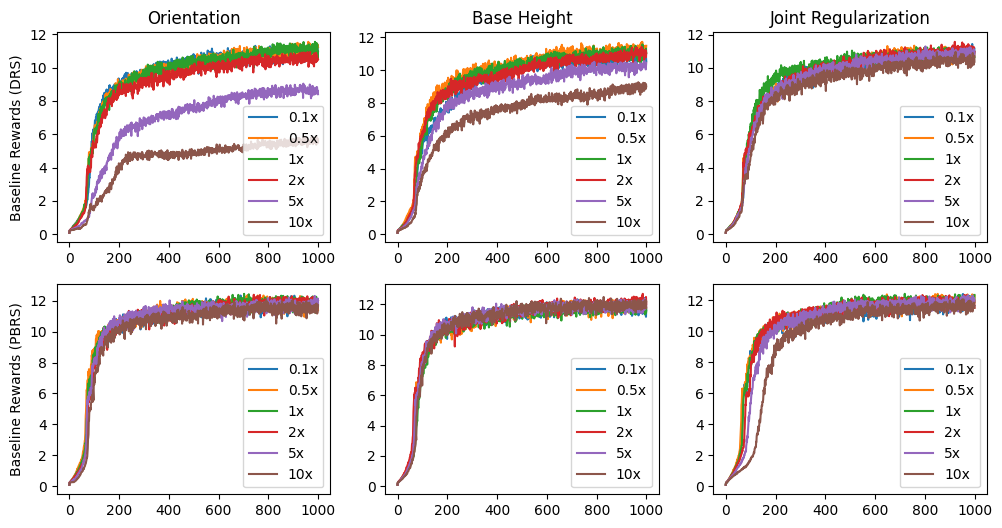

In [5]:
reward_name_list = ['Orientation','Base Height','Joint Regularization']
fig, axes = plt.subplots(2,3,figsize=(12,6))
subplot_idx = 1
for idx, data in enumerate(DRS_data):
    ax = plt.subplot(2,3,subplot_idx)
    for run_data in data:
        ax.plot(run_data)
    
    if idx == 0:
        ax.set_ylabel('Baseline Rewards (DRS)')
    ax.legend(['0.1x','0.5x','1x','2x','5x','10x'])
    ax.set_title(reward_name_list[idx])
    subplot_idx += 1

for idx, data in enumerate(PBRS_data):
    ax = plt.subplot(2,3,subplot_idx)
    for run_data in data:
        ax.plot(run_data)
    
    if idx == 0:
        ax.set_ylabel('Baseline Rewards (PBRS)')
    ax.legend(['0.1x','0.5x','1x','2x','5x','10x'])
    subplot_idx += 1

plt.show()